In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df = df[(df['gender'] != 'Other')]

We will drop every patient younger than 38. Our model is for patients 38 and older.

The reason is that the model will have an easier time modeling just for older people and not for people of all ages. Since only 3 out of 2026 patients younger than 38 had a stroke, there is not much to learn for this group of young people.

In [ ]:
df = df[(df['age'] >= 38)]

In [ ]:
df['ever_married'].replace(['Yes','No'],[1,0],inplace=True)

In [ ]:

df['ever_married'].unique()

array([1, 0])

In [ ]:
df = df.drop('work_type', axis=1)

Check avg_glucose_level *column*

In [ ]:
df['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ..., 125.2 , 166.29,  85.28])

In [ ]:
df['avg_glucose_level'].unique().shape

(2689,)

In [ ]:
(df['avg_glucose_level']>50).sum()

3083

In [ ]:
df.shape

(3083, 11)

Check how many data in bmi are missing

In [ ]:
(df['bmi'].isnull()).sum()

149

In [ ]:
df = df[-df['bmi'].isnull()]

Check smoking status column

In [ ]:
df.shape

(2934, 11)

Check stroke column

In [ ]:
df['stroke'].unique()

array([1, 0])

In [ ]:
df['stroke'].sum()

207

Check the number of patients we have now

In [ ]:
df = df.drop('id', axis=1)

In [ ]:
df['gender'].replace(['Male','Female'],[0,1],inplace=True)

In [ ]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

One hot encoding for smoking typew

In [ ]:
df['formerly_smoked'] = df['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],[1,0,0,0])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,formerly_smoked
0,0,67.0,0,1,1,Urban,228.69,36.6,formerly smoked,1,1
2,0,80.0,0,1,1,Rural,105.92,32.5,never smoked,1,0
3,1,49.0,0,0,1,Urban,171.23,34.4,smokes,1,0
4,1,79.0,1,0,1,Rural,174.12,24.0,never smoked,1,0
5,0,81.0,0,0,1,Urban,186.21,29.0,formerly smoked,1,1


In [ ]:
df['never_smoked'] = df['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],[0,1,0,0])

df['smokes'] = df['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],[0,0,1,0])

df['Unknown'] = df['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],[0,0,0,1])

In [ ]:
df.drop(columns='smoking_status',inplace=True)

In [ ]:
df['Residence_type'].replace(['Urban','Rural'],[1,0],inplace=True)

I will create the numpy array y with the labels

In [ ]:
y = df['stroke'].values

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

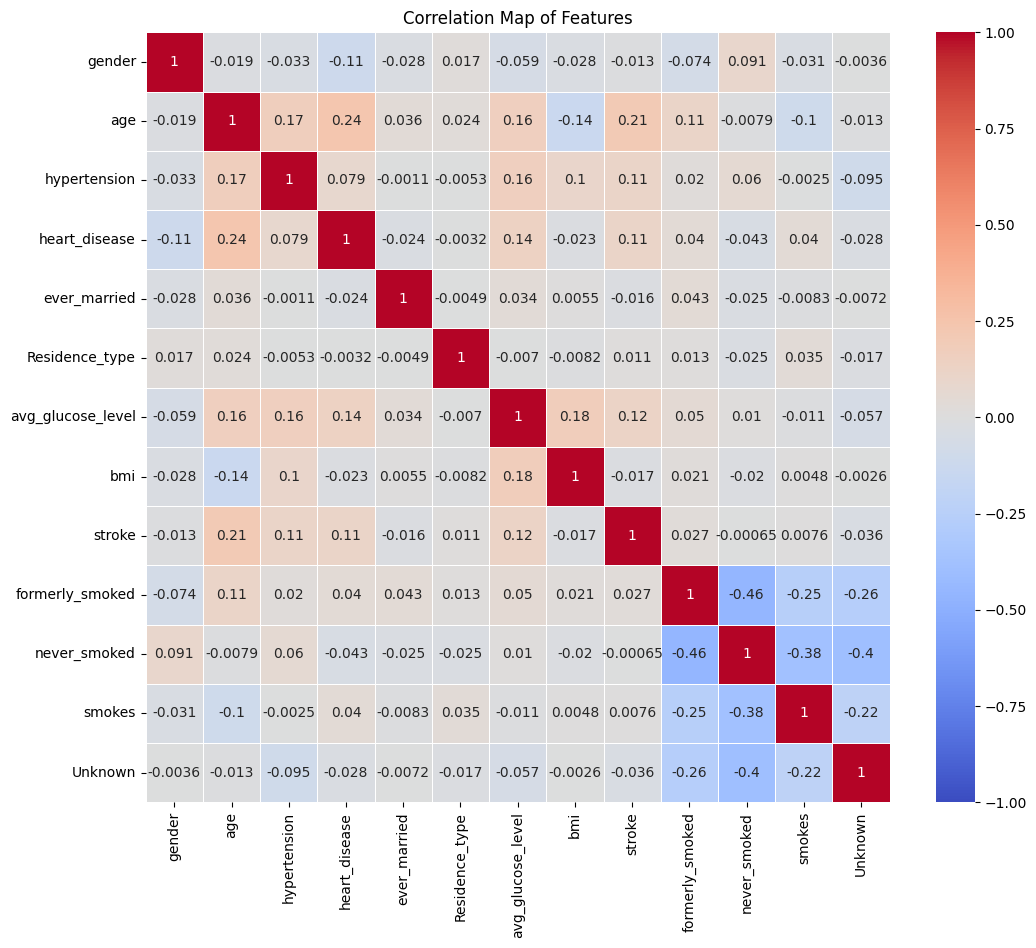

In [ ]:
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5)

# Add title and adjust layout
plt.title('Correlation Map of Features')
plt.show()

In [ ]:
df
df.drop(columns=['stroke'])

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,formerly_smoked,never_smoked,smokes,Unknown
0,0,67.0,0,1,1,1,228.69,36.6,1,0,0,0
2,0,80.0,0,1,1,0,105.92,32.5,0,1,0,0
3,1,49.0,0,0,1,1,171.23,34.4,0,0,1,0
4,1,79.0,1,0,1,0,174.12,24.0,0,1,0,0
5,0,81.0,0,0,1,1,186.21,29.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5101,1,45.0,0,0,1,1,97.95,24.5,0,0,0,1
5102,1,57.0,0,0,1,0,77.93,21.7,0,1,0,0
5106,1,81.0,0,0,1,1,125.20,40.0,0,1,0,0
5108,0,51.0,0,0,1,0,166.29,25.6,1,0,0,0


Now, the numpy array X with the features

In [ ]:
X = (df.drop(columns=['stroke'])).values
df = df.drop(columns=['stroke'])

In [ ]:
X=df.values
X = (df.drop(columns=['gender', 'hypertension', 'ever_married','heart_disease','never_smoked', 'Residence_type', 'formerly_smoked', 'never_smoked','smokes','Unknown'])).values

In [ ]:
print(X[:5,:])

[[ 67.   228.69  36.6 ]
 [ 80.   105.92  32.5 ]
 [ 49.   171.23  34.4 ]
 [ 79.   174.12  24.  ]
 [ 81.   186.21  29.  ]]


In [ ]:
X_add = X[y == 1]
y_add = np.ones(X_add.shape[0])

Add a copy of the stroke patients to the set

In [ ]:
for i in range(12):
  X = np.append(X,X_add,axis=0)
  y = np.append(y,y_add)
print('had a stroke',(y == 1).sum())
print('did not have a stroke', len(y)-(y == 1).sum())

had a stroke 2691
did not have a stroke 2727


In [ ]:
y.shape

(5418,)

Now, we split into training and validation set

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X.shape


(5418, 3)

Scale

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)

In [ ]:
rfe.fit(X_train, y_train)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)

In [ ]:
X.shape

In [ ]:
df.shape

In [ ]:
for i, col in enumerate(df.columns):
    print(f"{col} selected={rfe.support_[i]} rank = {rfe.ranking_[i]}")

gender selected=False rank = 6
age selected=True rank = 1
hypertension selected=False rank = 5
heart_disease selected=False rank = 7
ever_married selected=False rank = 9
Residence_type selected=False rank = 2
avg_glucose_level selected=True rank = 1
bmi selected=True rank = 1
formerly_smoked selected=False rank = 8
never_smoked selected=False rank = 3
smokes selected=False rank = 4
Unknown selected=False rank = 10


In [ ]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator = DecisionTreeClassifier(), scoring = 'accuracy', min_features_to_select=2)


In [ ]:
rfecv.fit(X_train, y_train)


RFECV(estimator=DecisionTreeClassifier(), min_features_to_select=2,
      scoring='accuracy')

In [ ]:
for i, col in enumerate(df.columns):
    print(f"{col} selected={rfecv.support_[i]} rank = {rfecv.ranking_[i]}")

gender selected=True rank = 1
age selected=True rank = 1
hypertension selected=True rank = 1
heart_disease selected=True rank = 1
ever_married selected=False rank = 3
Residence_type selected=True rank = 1
avg_glucose_level selected=True rank = 1
bmi selected=True rank = 1
formerly_smoked selected=True rank = 1
never_smoked selected=True rank = 1
smokes selected=True rank = 1
Unknown selected=False rank = 2


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = rfecv.predict(X_val)
print(f"Test Accuracy: {accuracy_score(y_val, y_pred)}")
print(classification_report(y_val, y_pred))

Test Accuracy: 0.9535055350553505
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95       686
         1.0       0.91      1.00      0.96       669

    accuracy                           0.95      1355
   macro avg       0.96      0.95      0.95      1355
weighted avg       0.96      0.95      0.95      1355



In [ ]:
X_train.shape

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

# Train model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_val)


In [ ]:
print(y_pred)

[1. 0. 0. ... 0. 1. 0.]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_val, y_pred))
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



Accuracy: 0.9542435424354243
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95       686
         1.0       0.92      1.00      0.96       669

    accuracy                           0.95      1355
   macro avg       0.96      0.95      0.95      1355
weighted avg       0.96      0.95      0.95      1355

Mean Squared Error: 0.045756457564575644


Feature ranking:
1. feature 6 (0.3360733562816292)
2. feature 1 (0.27742291420373566)
3. feature 7 (0.23007056724265568)
4. feature 9 (0.03327957339129746)
5. feature 10 (0.027007480662007873)
6. feature 2 (0.01932319580614171)
7. feature 5 (0.017034704838800634)
8. feature 0 (0.01628858139059802)
9. feature 3 (0.013606420153511918)
10. feature 8 (0.011812776778681658)
11. feature 4 (0.010120748642745842)
12. feature 11 (0.007959680608194492)


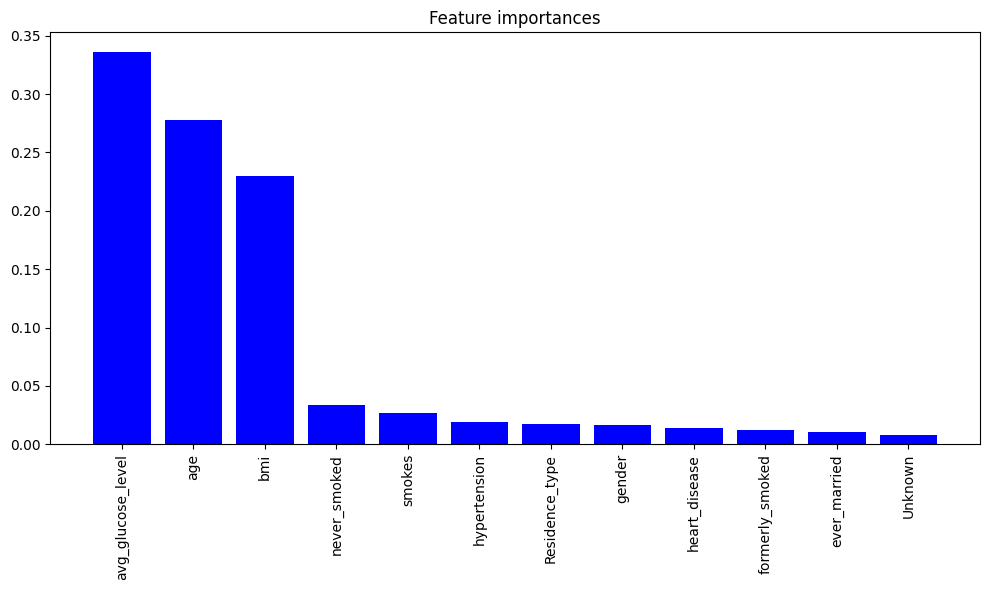

In [ ]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importances of the decision tree
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), df.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

Just to compute errors later

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
bce = BinaryCrossentropy()

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

         0.0       0.71      0.65      0.68       686
         1.0       0.67      0.72      0.70       669

    accuracy                           0.69      1355
   macro avg       0.69      0.69      0.69      1355
weighted avg       0.69      0.69      0.69      1355



Model (Nerual network, binary classification problem)

,loss,accuracy,val_loss,val_accuracy
0,0.693897,0.532365,0.680050,0.550554
1,0.672694,0.577898,0.666485,0.599262
2,0.657896,0.621954,0.652986,0.630996
3,0.644702,0.649274,0.640479,0.660517
4,0.632369,0.669702,0.630276,0.671587
...,...,...,...,...
95,0.568058,0.716220,0.580999,0.706273
96,0.568084,0.713266,0.580193,0.707011
97,0.568070,0.713512,0.580295,0.706273
98,0.567946,0.714989,0.580083,0.706273


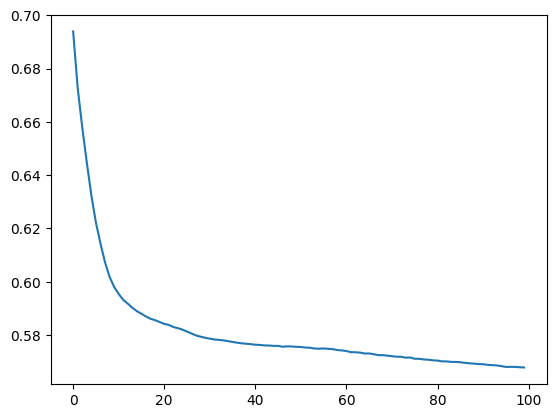

In [ ]:

import tensorflow as tf
model = Sequential()
model.add(Dense(2, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train_scaled,y_train,epochs=100,verbose=0, validation_data = (X_val_scaled,y_val))
J_list = model.history.history['loss']
plt.plot(J_list)
pd.DataFrame(model.history.history)


In [ ]:
from sklearn.inspection import permutation_importance
preds_binary = model.predict(X_val_scaled)
print(preds_binary)
y_val_binary = (y_val).astype(int)
# Wrap the model
def custom_accuracy(model, X,y):
  y_pred= model.predict(X)
  y_pred_cat = 1*(y_pred > 0.50)
  return accuracy_score(y_pred_cat, y)


r = permutation_importance(model, X_val_scaled, y_val, n_repeats=10, scoring=custom_accuracy, random_state=42)



43/43 [==============================] - 0s 1ms/step
[[0.60031563]
 [0.27135926]
 [0.30415544]
 ...
 [0.19197018]
 [0.8578467 ]
 [0.24558929]]
43/43 [==============================] - 0s 2ms/step


In [ ]:
  type(y_val[0])

numpy.float64

In [ ]:
  import matplotlib.pyplot as plt
  for i in r.importances_mean.argsort()[::-1]:

        print(f"{df.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

# importances = r.importances_mean
# std = r.importances_std
# features = df.columns

# indices = np.argsort(importances)
# sorted_importances = importances[indices]
# sorted_features = np.array(features)[indices]
# sorted_std = std[indices]
# sorted_importances = sorted_importances[::-1]
# sorted_features = sorted_features[::-1]
# sorted_std = sorted_std[::-1]

# plt.bar(range(len(sorted_importances)), sorted_importances, yerr=sorted_std, align='center')
# plt.xticks(range(len(sorted_importances)), sorted_features, rotation=90)

age     0.154 +/- 0.013
avg_glucose_level0.026 +/- 0.005
heart_disease0.017 +/- 0.003
Residence_type0.012 +/- 0.002
smokes  0.011 +/- 0.003
hypertension0.010 +/- 0.004
formerly_smoked0.004 +/- 0.001
Unknown 0.003 +/- 0.002
ever_married0.003 +/- 0.002
never_smoked0.002 +/- 0.003
bmi     -0.000 +/- 0.002
gender  -0.002 +/- 0.001


In [ ]:
y_val_hat = model.predict(X_val_scaled)
print('Validation error =',bce(y_val.reshape(-1,1), y_val_hat).numpy())

y_train_hat = model.predict(X_train_scaled)
print('Training error =',bce(y_train.reshape(-1,1), y_train_hat).numpy())

43/43 [==============================] - 0s 1ms/step
Validation error = 0.5795761
127/127 [==============================] - 0s 1ms/step
Training error = 0.56695503


In [ ]:
   y_train_hat_cat = 1*(y_train_hat > 0.50)
print(classification_report(y_train,y_train_hat_cat))

NameError: name 'y_train_hat' is not defined

In [ ]:
y_val_hat_cat = 1*(y_val_hat > 0.50)
print(classification_report(y_val,y_val_hat_cat))

              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71       686
         1.0       0.70      0.72      0.71       669

    accuracy                           0.71      1355
   macro avg       0.71      0.71      0.71      1355
weighted avg       0.71      0.71      0.71      1355



In [ ]:
   from sklearn.metrics import f1_score
xarr = np.array([])
yarr=np.array([])
highest =0
highestx=0
for i in range(1000):

  y_val_hat_cat = 1*(y_val_hat > float(i)/1000)
  if(f1_score(y_val, y_val_hat_cat) > highest):
    highest = f1_score(y_val, y_val_hat_cat)
    highestx=float(i)/1000
  yarr= np.append(yarr,f1_score(y_val, y_val_hat_cat))
  xarr= np.append(xarr,float(i)/1000 )

print(highestx)


0.344


In [ ]:
yarr

array([0.49372694, 0.49372694, 0.49372694, 0.49372694, 0.49372694,
       0.49372694, 0.49372694, 0.49372694, 0.49372694, 0.49372694,
       0.49372694, 0.49372694, 0.49372694, 0.49372694, 0.49372694,
       0.49372694, 0.49372694, 0.49372694, 0.49372694, 0.49372694,
       0.49372694, 0.49372694, 0.49372694, 0.49372694, 0.49372694,
       0.49372694, 0.49372694, 0.49372694, 0.49372694, 0.49372694,
       0.49372694, 0.49372694, 0.49372694, 0.49372694, 0.49372694,
       0.49372694, 0.49446494, 0.49520295, 0.49520295, 0.49520295,
       0.49520295, 0.49520295, 0.49520295, 0.49520295, 0.49520295,
       0.49520295, 0.49520295, 0.49594096, 0.49667897, 0.49667897,
       0.49889299, 0.49889299, 0.499631  , 0.500369  , 0.500369  ,
       0.50110701, 0.50184502, 0.50258303, 0.50332103, 0.50332103,
       0.50332103, 0.50479705, 0.50479705, 0.50553506, 0.50627306,
       0.50701107, 0.50405904, 0.50405904, 0.50405904, 0.50553506,
       0.50553506, 0.50553506, 0.50553506, 0.50553506, 0.50627

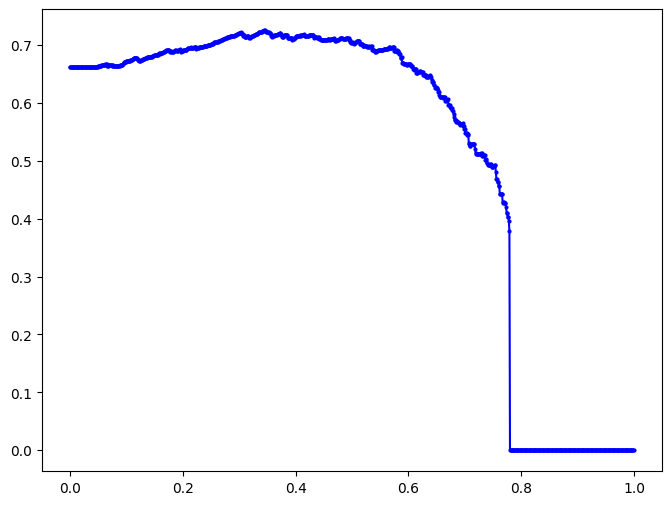

In [ ]:
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.plot(xarr, yarr, marker='o', linestyle='-', color='b', label='Array Values',markersize=2)

In [ ]:
  X_val.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train_scaled,y_train)

rfc_tuned_pred = rfc.predict(X_val_scaled)
print(classification_report(y_val,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_val,rfc_tuned_pred))


              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       686
         1.0       0.97      1.00      0.98       669

    accuracy                           0.98      1355
   macro avg       0.98      0.98      0.98      1355
weighted avg       0.98      0.98      0.98      1355

Accuracy Score:  0.9837638376383764


NameError: name 'f1_score' is not defined